<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/ml/Untitled100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

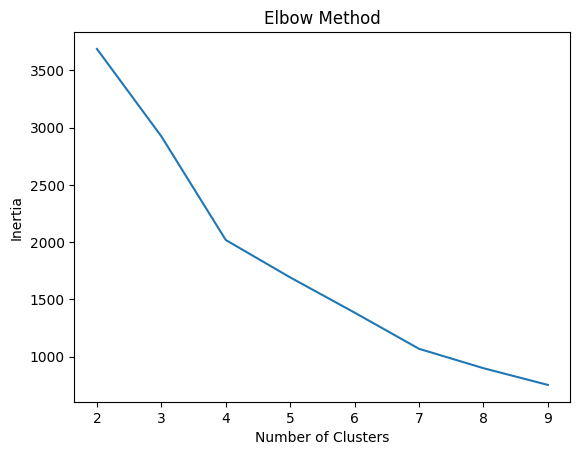

Cluster 0:
 feat_PE           26.82
feat_PB            3.62
feat_Div_Yield     1.19
dtype: float64
Cluster 1:
 feat_PE           20.89
feat_PB            4.13
feat_Div_Yield     1.33
dtype: float64
Cluster 2:
 feat_PE           32.31
feat_PB            3.20
feat_Div_Yield     1.45
dtype: float64
Cluster 3:
 feat_PE           21.00
feat_PB            2.99
feat_Div_Yield     1.53
dtype: float64
Cluster 4:
 feat_PE           38.45
feat_PB            4.12
feat_Div_Yield     1.09
dtype: float64
Cluster 5:
 feat_PE           26.250
feat_PB            4.375
feat_Div_Yield     1.135
dtype: float64
Cluster 6:
 feat_PE           23.375
feat_PB            3.390
feat_Div_Yield     1.290
dtype: float64


<ipython-input-29-474aaaf63238>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your 10-year Nifty data (assuming a CSV format)
data_r = pd.read_csv('/content/data_fundamental.csv', index_col='Date', parse_dates=True)
data_r.reset_index(inplace=True)
'''
# Feature engineering (optional)
for m in [50, 200]:
    data_r[f'feat_dist_from_ma_{m}'] = data_r['Close']/data_r['Close'].rolling(m).mean()-1

# Distance from n day max/min
for m in [50, 200]:
    data_r[f'feat_dist_from_max_{m}'] = data_r['Close']/data_r['High'].rolling(m).max()-1
    data_r[f'feat_dist_from_min_{m}'] = data_r['Close']/data_r['Low'].rolling(m).min()-1

# Price distance
for m in [20,50]:
    data_r[f'feat_price_dist_{m}'] = data_r['Close']/data_r['Close'].shift(m)-1
'''
data=data_r[(data_r['Date'] >= '2015-01-01') & (data_r['Date'] < '2022-11-30')]
# Select features and scale the data
features = [col for col in data_r.columns if 'feat' in col]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Determine the number of clusters (Elbow Method)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init='auto')
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal_k based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=0, n_init='auto')
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].median())


In [30]:
'''
import seaborn as sns

sns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',
             markers='+', hue='Cluster', palette='viridis')
plt.show()
'''

"\nimport seaborn as sns\n\nsns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',\n             markers='+', hue='Cluster', palette='viridis')\nplt.show()\n"

In [31]:
# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].median())


Cluster 0:
 feat_PE           26.82
feat_PB            3.62
feat_Div_Yield     1.19
dtype: float64
Cluster 1:
 feat_PE           20.89
feat_PB            4.13
feat_Div_Yield     1.33
dtype: float64
Cluster 2:
 feat_PE           32.31
feat_PB            3.20
feat_Div_Yield     1.45
dtype: float64
Cluster 3:
 feat_PE           21.00
feat_PB            2.99
feat_Div_Yield     1.53
dtype: float64
Cluster 4:
 feat_PE           38.45
feat_PB            4.12
feat_Div_Yield     1.09
dtype: float64
Cluster 5:
 feat_PE           26.250
feat_PB            4.375
feat_Div_Yield     1.135
dtype: float64
Cluster 6:
 feat_PE           23.375
feat_PB            3.390
feat_Div_Yield     1.290
dtype: float64


In [32]:
data_s=data

In [33]:
data_s.reset_index(inplace=True)

In [34]:
import plotly.express as px



fig = px.scatter(
    data_s,
    x='Date',
    y='Close',
    color='Cluster',
    color_continuous_scale='rdylgn',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()


In [35]:
df_test = data_r[data_r['Date'] >= '2022-12-01'].reset_index(drop=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_test[features])

df_test['cluster'] = kmeans.predict(scaled_data)

fig = px.scatter(
    df_test,
    x='Date',
    y='Close',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Testing-- LOOK FOR BOTTOMS FORMING',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()

In [43]:
# Analyze and interpret clusters
for i in range(7):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].mean())


Cluster 0:
 feat_PE           26.874698
feat_PB            3.608434
feat_Div_Yield     1.157962
dtype: float64
Cluster 1:
 feat_PE           20.822012
feat_PB            4.131124
feat_Div_Yield     1.335089
dtype: float64
Cluster 2:
 feat_PE           31.842604
feat_PB            3.226979
feat_Div_Yield     1.421979
dtype: float64
Cluster 3:
 feat_PE           21.154811
feat_PB            2.928915
feat_Div_Yield     1.557217
dtype: float64
Cluster 4:
 feat_PE           37.787679
feat_PB            4.057143
feat_Div_Yield     1.093929
dtype: float64
Cluster 5:
 feat_PE           26.079018
feat_PB            4.371071
feat_Div_Yield     1.131786
dtype: float64
Cluster 6:
 feat_PE           23.766834
feat_PB            3.397695
feat_Div_Yield     1.310162
dtype: float64


In [36]:
df_test['cluster'].tail(1)

309    0
Name: cluster, dtype: int32

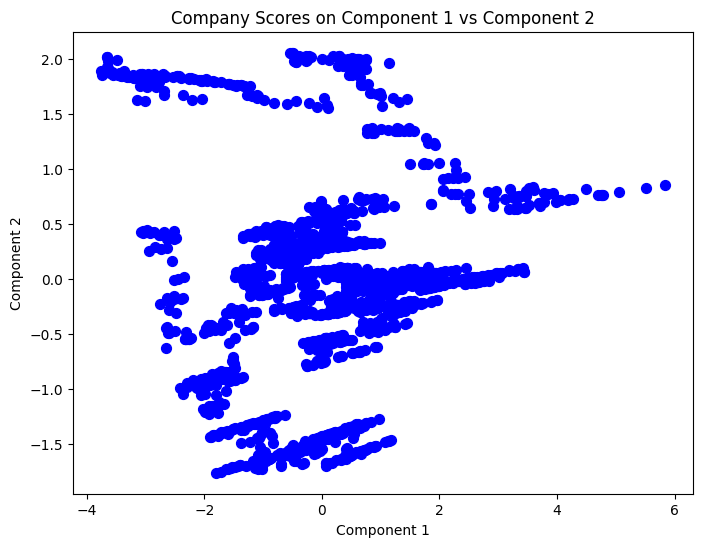

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data[features]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create PCA object with 3 components
pca = PCA(n_components=3)

# Fit and transform the data
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame to hold results
df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2', 'PC3'])

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Company Scores on Component 1 vs Component 2')
plt.show()


In [38]:
# View the 'loadings' to understand how original ratios contribute to components
print(pca.components_)




[[-0.50011301 -0.57885882  0.64405702]
 [ 0.81226723 -0.57139431  0.11717717]
 [-0.30018148 -0.58174824 -0.75594977]]


In [39]:
# Calculate explained variance to see importance of each component
print(pca.explained_variance_ratio_)

[0.64851295 0.24480821 0.10667884]


<ipython-input-40-9b46738d0002>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



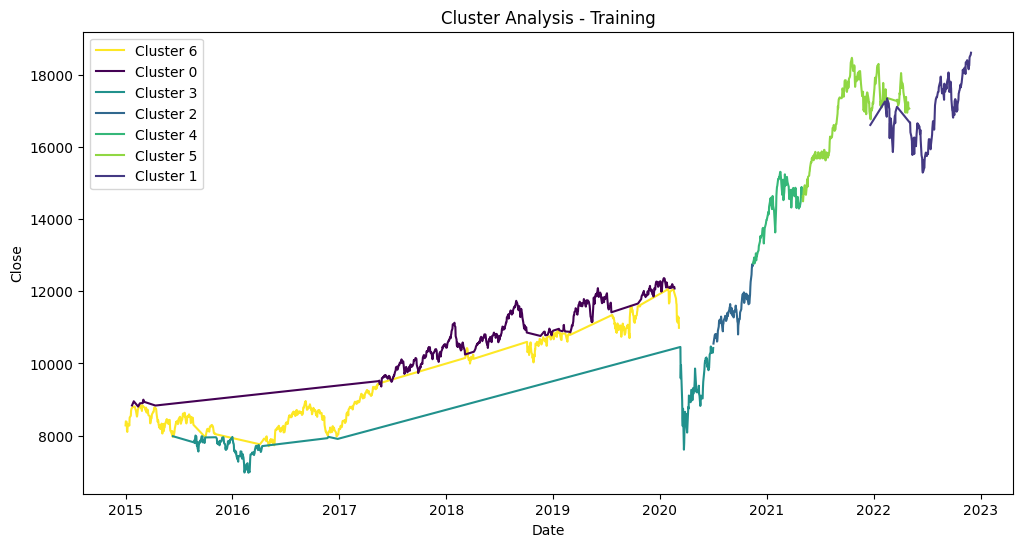

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm  # For the 'viridis' colormap

# ... (Assume your data_s DataFrame exists with 'Date', 'Close', 'Cluster')

# Extract unique clusters in order for sequential coloring
unique_clusters = data_s['Cluster'].unique()

# Get 'viridis' colormap and normalize
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colors from colormap
for i, cluster in enumerate(unique_clusters):
    cluster_data = data_s[data_s['Cluster'] == cluster]
    ax.plot(cluster_data['Date'], cluster_data['Close'],
               c=cmap(normalize(cluster)),
               label=f'Cluster {cluster}')

# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()


<ipython-input-41-8c9dfb6599fe>:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



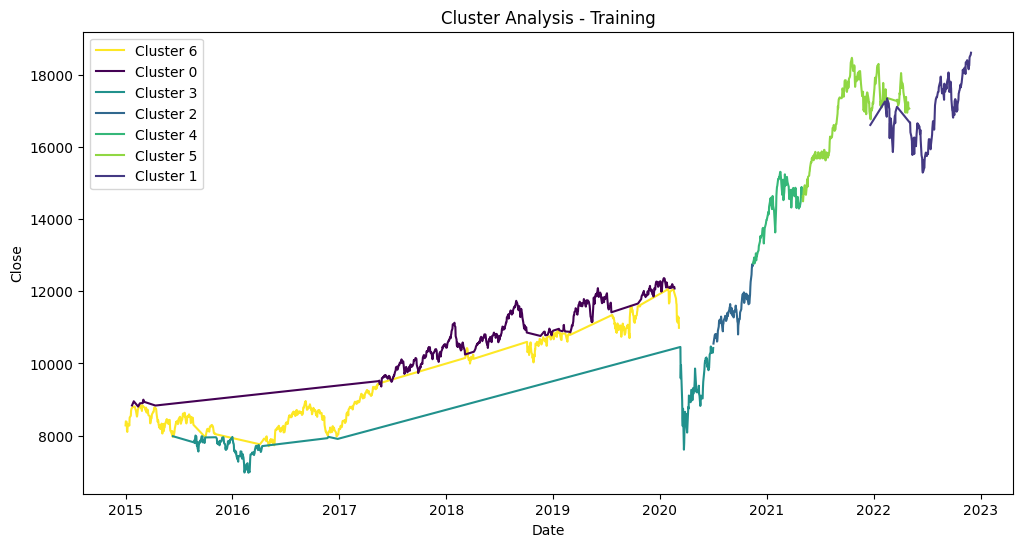

In [41]:
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))
# Line plot for each cluster
for i, cluster in enumerate(unique_clusters):
   cluster_data = data_s[data_s['Cluster'] == cluster]
   ax.plot(cluster_data['Date'], cluster_data['Close'],
           c=cmap(normalize(cluster)),
           label=f'Cluster {cluster}')
# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()